# **Project 1# Detecting breast cancer using KNN **

In [11]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
#load data
data = pd.read_csv('/content/data.csv')

In [13]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [15]:
#check missing values
print("Checking missing values\n")
print(data.isnull().sum())

Checking missing values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimens

In [16]:
#make it as a data frame
df = pd.DataFrame(data)
print("\n")

In [17]:
#print data shape
print("Shape of data\n",df.shape)

Shape of data
 (569, 33)


In [18]:
#counts in each class
print("\n")
print("Counts in each class\n")
count = df['diagnosis'].value_counts()
print(count)



Counts in each class

B    357
M    212
Name: diagnosis, dtype: int64


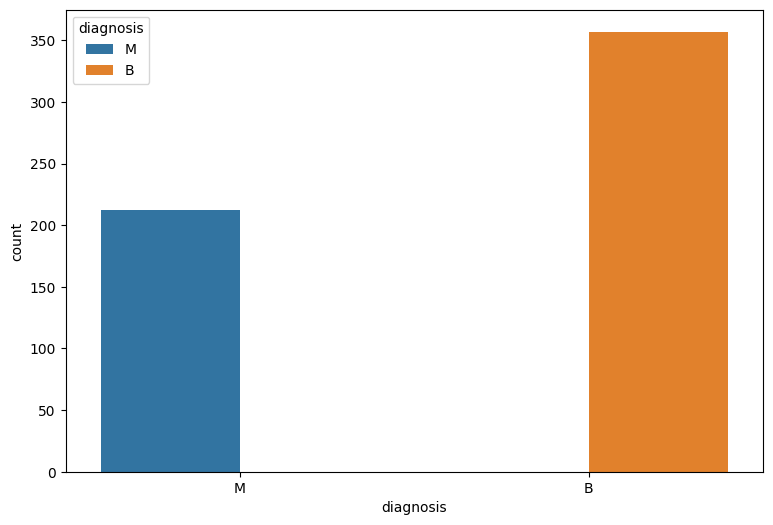

In [19]:
#Count plot for target
plt.rcParams["figure.figsize"] = [9,6]
sns.countplot(x='diagnosis',hue="diagnosis", data=df)
plt.show()

In [20]:
#Define X and y variable
X = df.iloc[:,2:32]
y = df.iloc[:,1]

In [21]:
#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
#training set and testing set
print("\n")
print("Training data set\n",X_train,"\n",y_train)
print("\n")
print("Testing data set\n",X_test)



Training data set
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
338       10.050         17.53           64.41      310.8          0.10070   
427       10.800         21.98           68.79      359.9          0.08801   
406       16.140         14.86          104.30      800.0          0.09495   
96        12.180         17.84           77.79      451.1          0.10450   
490       12.250         22.44           78.18      466.5          0.08192   
..           ...           ...             ...        ...              ...   
277       18.810         19.98          120.90     1102.0          0.08923   
9         12.460         24.04           83.97      475.9          0.11860   
359        9.436         18.32           59.82      278.6          0.10090   
192        9.720         18.22           60.73      288.1          0.06950   
559       11.510         23.93           74.52      403.5          0.09261   

     compactness_mean  concavity_mean  con

In [23]:
#Build the KNN model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
y_pred = knn_best.predict(X_test)

In [24]:
#classification report & confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))
print("\n")
print("Classification Report\n",classification_report(y_test,y_pred))
print("\n")
print("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Confusion Matrix
 [[66  1]
 [ 3 44]]


Classification Report
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        67
           M       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Accuracy :  96.49122807017544
